In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [2]:
dataset = pd.read_csv('CarPrice.csv')

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.shape

(205, 26)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
dataset['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

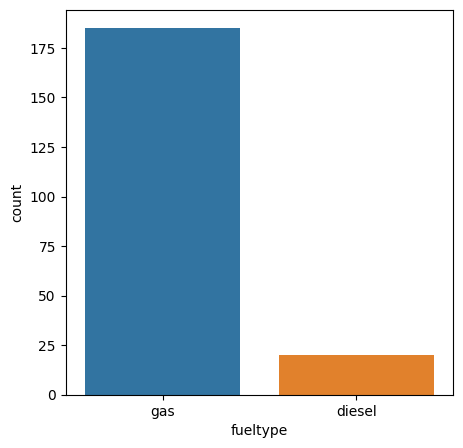

In [9]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'fueltype', data = dataset)
plt.show()

In [10]:
dataset['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

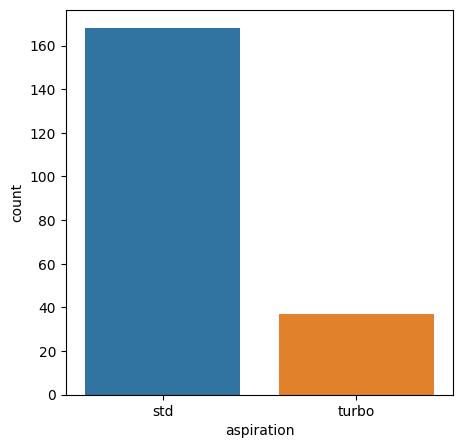

In [11]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'aspiration', data = dataset)
plt.show()

In [12]:
dataset['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

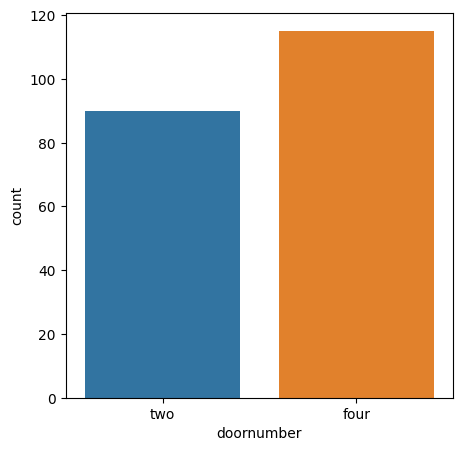

In [13]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'doornumber', data = dataset)
plt.show()

In [14]:
dataset['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

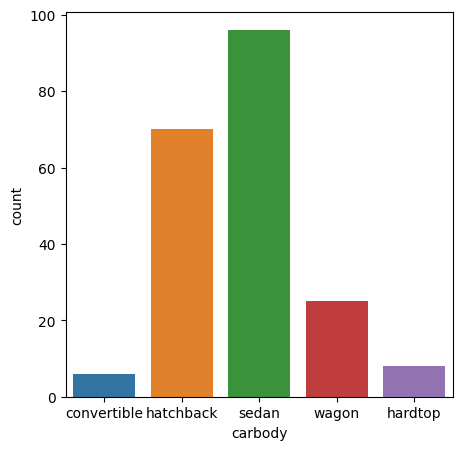

In [15]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'carbody', data = dataset)
plt.show()

In [16]:
dataset['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

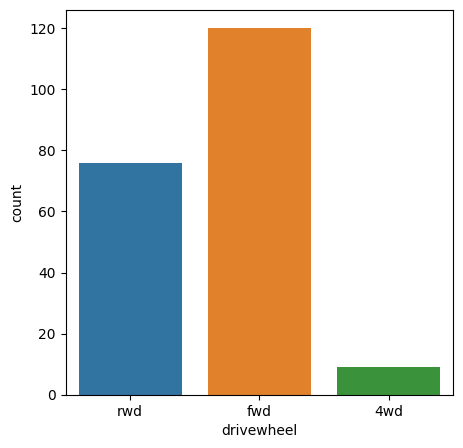

In [17]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'drivewheel', data = dataset)
plt.show()

In [18]:
dataset['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

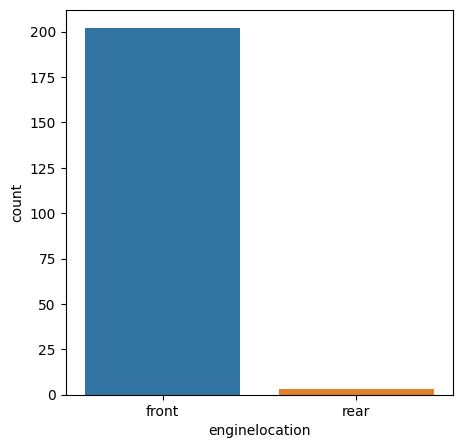

In [19]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'enginelocation', data = dataset)
plt.show()

In [20]:
dataset['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

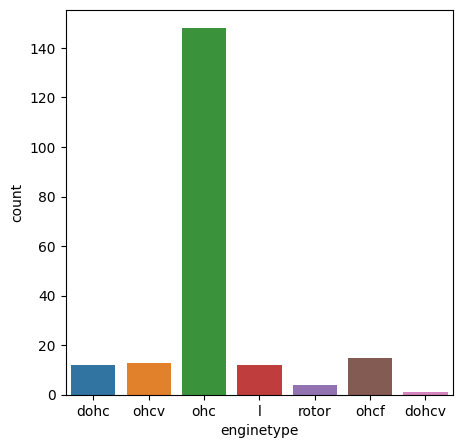

In [21]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'enginetype', data = dataset)
plt.show()

In [22]:
dataset['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

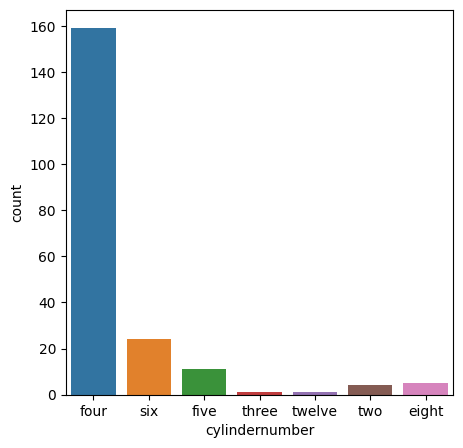

In [23]:
plt.figure (figsize=(5,5))
sns.countplot (x = 'cylindernumber', data = dataset)
plt.show()

In [24]:
dataset['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

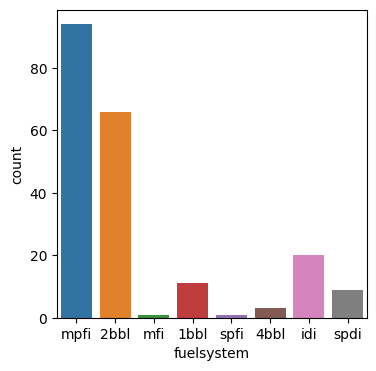

In [25]:
plt.figure (figsize=(4,4))
sns.countplot (x = 'fuelsystem', data = dataset)
plt.show()

C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_23124\1741860679.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<AxesSubplot: >

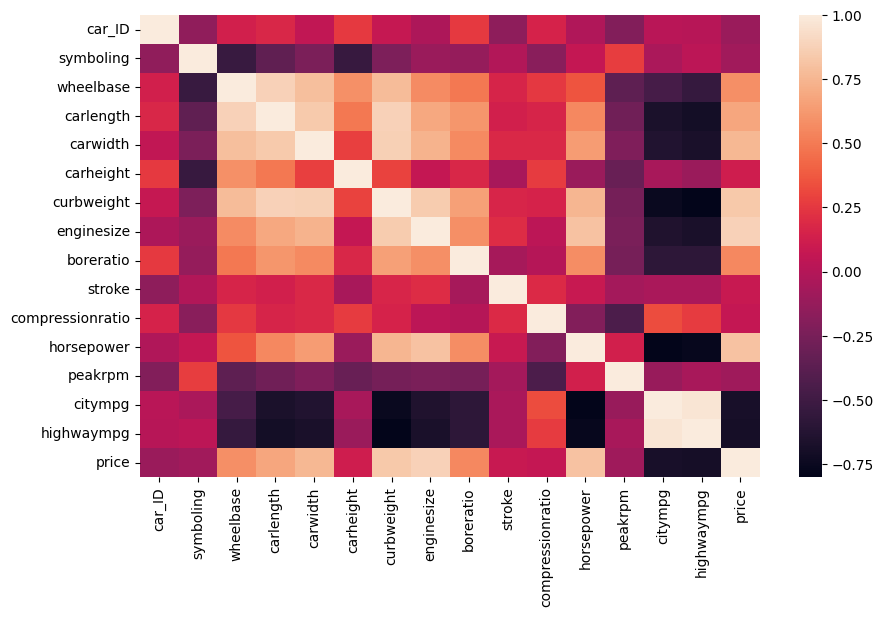

In [26]:
#visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr())

In [27]:
dataset['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [28]:
#Create new column cars_company
dataset['cars_company'] = dataset['CarName'].apply(lambda x:x.split(' ')[0])
dataset['cars_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: cars_company, dtype: object

In [29]:
dataset =  dataset.drop(['CarName'], axis =1)

In [30]:
dataset['cars_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: cars_company, dtype: int64

In [31]:
dataset['cars_company'].replace('toyouta', 'toyota',inplace=True)
dataset['cars_company'].replace('Nissan', 'nissan',inplace=True)
dataset['cars_company'].replace('maxda', 'mazda',inplace=True)
dataset['cars_company'].replace('vokswagen', 'volkswagen',inplace=True)
dataset['cars_company'].replace('vw', 'volkswagen',inplace=True)
dataset['cars_company'].replace('porcshce', 'porsche',inplace=True)

In [32]:
# Rechecking the data:
dataset['cars_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: cars_company, dtype: int64

In [33]:
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cars_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [34]:
dataset = dataset.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
                      'enginetype', 'fuelsystem', 'cars_company'], axis=1)

In [35]:
dataset.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
#transfer data from string to integer
from sklearn.preprocessing import LabelEncoder

for column in dataset.columns:
    if dataset[column].dtype == np.number:
        continue
    dataset[column] = LabelEncoder().fit_transform(dataset[column])

dataset.head()

C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_23124\3849785181.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number:
C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_23124\3849785181.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number:
C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_23124\3849785181.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset[column].dtype == np.number:
C:\Users\Vaishnavi Patil\AppData\Local\Temp\ipykernel_23124\3849785181.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` 

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,5,1,88.6,168.8,64.1,48.8,92,2,18,3.47,2.68,9.0,30,10,8,10,13495.0
1,1,5,1,88.6,168.8,64.1,48.8,92,2,18,3.47,2.68,9.0,30,10,8,10,16500.0
2,2,3,1,94.5,171.2,65.5,52.4,115,3,28,2.68,3.47,9.0,45,10,6,9,16500.0
3,3,4,0,99.8,176.6,66.2,54.3,66,2,11,3.19,3.40,10.0,27,16,11,13,13950.0
4,4,4,0,99.4,176.6,66.4,54.3,116,1,22,3.19,3.40,8.0,33,16,5,5,17450.0


In [37]:
X = dataset.drop(columns = 'price', axis=1) 
Y = dataset['price']

In [38]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [39]:
#loding the linear regression model
regressor = LinearRegression()

In [40]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [41]:
#prediction on training data
training_data_prediction= regressor.predict(X_train)

In [42]:
#prediction on testing data
test_data_prediction= regressor.predict(X_test)

In [43]:
#R squared value of train data.
from sklearn.metrics import r2_score 
import math

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value is: ", r2_train)


R squared value is:  0.8350640034414523


The R-squared value is near to one so our model is predicting good.